# <div style='text-align: center;'> Proyecto final: Mauricio Morán </div>
---

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/2/26/Spotify_logo_with_text.svg" width = 50% high = 50%><center>

## Índice
---

* [1. Introducción](#intro)
* [2. Contexto](#contexto)
* [3. Preguntas de interés](#preguntas)
* [4. Análisis exploratorio de los datos](#eda)
    * [4.1. Popularidad](#popularidad)
        * [4.1.1. Géneros](#pop_generos)
        * [4.1.2. Artistas](#pop_artistas)
        * [4.1.3. Canciones](#pop_canciones)
    * [4.2. Duración](#duracion)
    * [4.3. Bailabilidad](#baile)
    * [4.4. Palabra hablada](#hablada)
    * [4.5. Letras explícitas](#explicito)
    * [4.6. Evolución con el tiempo](#tiempo)
    * [4.7. Análisis univariado](#histogramas)
    * [4.8. Análisis bivariado](#puntos)
    * [4.9. Correlaciones](#cajas)
* [5. Insights y recomendaciones](#insights)
* [6. Data Cleaning](#cleaning)
    * [6.1. Datos nulos](#nulos)
    * [6.2. Datos duplicados](#duplicados)
    * [6.3. Datos extremos](#outliers)
* [7. Data Wrangling](#wrangling)
* [8. Preprocesado de variables](#preprocesado)
* [9. Aprendizaje automático: Clasificación](#clasificacion)
    * [9.1. Reducción de la dimensionalidad](#dimensionalidad)  
    * [9.2. Selección de variables](#seleccion)
    * [9.3. Selección de modelos](#modelos)
    * [9.4. Búsqueda de hiperparámetros](#hiperparametros) 
    * [9.5. Análisis de sobreajuste](#sobreajuste)     
* [10. Aprendizaje automático: Agrupación](#agrupacion)
* [11. Sistema de recomendación](#recomendacion) 
* [12. Conclusiones y cierre](#conclusiones)      


## 1. Introducción <a class="anchor" id="intro"></a>
---
La industria de la música no es ajena a la innovación tecnológica: la revolución digital y la masificación del acceso del internet cambiaron las reglas del juego. Los servicios de streamming de música y podcasts hoy son la norma. Spotify, YouTube Music, Tidal y otros, compiten por liderar el mercado en donde implementar soluciones tecnológicas les permite destacarse por sobre las demás. Estos servicios deben atraer clientes y mantenerlos interesados mediante el uso sencillo e intuitivo de sus sistemas, de forma que les permita acceder a sus artistas y canciones favoritas mientras descubren nuevos géneros y tendencias musicales. Para dicha tarea son cruciales los sistemas de clasificación y recomendación de canciones en función de los gustos y preferencias de los clientes. En este terreno los algoritmos de aprendizaje automático lucen toda su potencia.

En el presente trabajo analizaremos una selección de canciones del servicio Spotify. Para ello, se realizará un análisis exploratorio para evaluar si la aplicación de algoritmos de clasificación y de clustering nos permitirian cumplir nuestros objetivos. Luego se evaluarán diferentes modelos, comparando sus bondades y desventajas, buscando siempre el mejor ajuste. Por último, se construirá un sistema de recomendación que entregue al oyente canciones recomendadas en función del parecido que tengan con una pieza musical de su preferencia. 

Se trabajará utilizando dos dataset, uno de ellos contiene una selección de 114 géneros musicales, cada uno con 1.000 piezas musicales de mayor consumo actual, totalizando 114.000 canciones. El segundo dataset está compuesto por las 200 canciones más populares de cada año, entre los años 1980 y 2022, sumando 8600 piezas musicales.

## 2. Contexto <a class="anchor" id="contexto"></a>
---

A los fines de atraer clientes y lograr su permanencia en el mismo, Spotify debe ofrecer una amplia variedad de géneros, artistas y canciones, junto con un sistema sencillo e intuitivo de usar. En este último ítem se encuentra el sistema de recomendación de canciones. Por otro lado, el servicio debe ser atractivo también para los artistas, atrayéndolos para que publiquen sus canciones en la plataforma. Para ello son cruciales los mecanismos que les den visibilidad dentro de la plataforma.

Surge la inquietud de definir un sistema de recomendación que fidelice tanto a los clientes como a los artistas. Para ello se propone un sistema de clasificación y de recomendación que ofrezca canciones que sean del agrado de los clientes y que, además, recomiende canciones de artistas nuevos. El objetivo es ampliar el número de artistas que los clientes escuchan, encontrando el balance entre artistas nuevos y artistas ya establecidos. Lo anterior busca dar más visibilidad a los intérpretes a la vez que brinda novedades a los clientes, manteniendo así su atención.

El sistema de clasificación y de recomendación se basará fuertemente en las semejanzas y diferencias estadísticas y las correlaciones entre las variables que componen el dataset. La información disponible se analizará buscando identificar semejanzas y diferencias entre las canciones y géneros musicales, evaluando si estas podrían dar sustento al mencionado sistema de recomendación.

## 3. Preguntas de interés <a class="anchor" id="preguntas"></a>
---

Se plantean una serie de hipótesis que serán resueltas por medio del análisis exploratorio de datos. Estas hipótesis buscan dar lugar a conclusiones que lleven a una mejor comprensión del comportamiento general de los clientes del servicio. Además, estas preguntas pueden dar lugar a un mejor sistema de clasificación y/o recomendación.

* ¿Cuáles son los géneros más populares?
* ¿Cuáles son los artistas más populares?
* ¿Todas las piezas musicales poseen voz cantada? ¿O existen piezas en dónde la voz es hablada?
* ¿Qué proporción de las canciones se las puede clasificar como bailables? 
* ¿Qué porcentaje de las canciones tienen letras explícitas?
* ¿Cuál es la duración promedio de las canciones?
* ¿Las variables que clasifican las canciones varían con los años? ¿Hay alguna tendencia que nos permita dar alguna idea de las preferencias futuras?

Estas hipótesis no serán respondidas en el orden en el que fueron planteadas sino de manera orgánica a medida que los datos son analizados.

## 4. Análisis exploratorio de datos <a class="anchor" id="eda"></a>
---

In [1]:
# Paquetes para manipulación de datos, su análisis estadístico y graficación 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statistics import median
import time
from wordcloud import WordCloud

# Manejo de advertencias
import warnings
warnings.filterwarnings("ignore")

# Scikit-learn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, recall_score, f1_score, davies_bouldin_score, silhouette_score, silhouette_samples
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Otros paquetes de aprendizaje automático
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('Spotify_Track_Dataset.csv')
df_api = pd.read_csv('Spotify_API.csv')

Llamaremos al dataset "df" como el dataset "original", mientras que al dataset "df_api" como el dataset extraído desde la API. 

In [3]:
print(df.shape, df_api.shape)

(114000, 21) (8598, 19)


In [4]:
df.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


In [5]:
df_api.head(3)

,Unnamed: 0,year,artist,track,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,1980,AC/DC,You Shook Me All Night Long,2SiXAy7TuUkycRVbbWDEpo,80,0.532,0.767,7,-5.509,1,0.0574,0.00287,0.000513,0.3900,0.755,127.361,210173,4
1,1,1980,AC/DC,Back In Black,08mG3Y1vljYA6bvDt4Wqkj,82,0.310,0.700,9,-5.678,1,0.0470,0.01100,0.009650,0.0828,0.763,188.386,255493,4
2,2,1980,Daryl Hall & John Oates,You Make My Dreams (Come True),4o6BgsqLIBViaGVbx5rbRk,77,0.751,0.501,5,-12.151,1,0.0551,0.23400,0.112000,0.0467,0.902,167.057,190627,4


Ambos dataset poseen estructura muy similar, compartiendo muchas de las variables. Entre las variables presentes se encuentra el nombre de la canción, su intérprete, álbum, duración y una serie de parámetros numéricos que dan información sobre el volumen, la energía que transmite, el carácter instrumental, la presencia de palabra hablada o cantanda, entre otras. La principal diferencia es que la base de datos extraída desde la API no incluye el género musical al que pertenecen las canciones. A continuación, se describen algunas de las variables, principalmente aquellas de significados complejos.

- popularity: Popularidad de la canción, toma valores entre 0 y 100, siendo 100 el más popular. 
- explicit: Informa si la canción posee letras explícitas o no.
- danceability: Describe cuan bailable es una canción. 0 indica poco bailable y 1 indica muy bailable.
- energy: Es una medida de la intensidad. Canciones energéticas se sienten rápidas, de volumen alto y ruidosas.
- loudness: Volumen promedio de la canción en decibelios.
- speechiness: Detecta la presencia de palabra hablada. Mientras más palabra hablada posea, más cerca de 1 estará el valor.
- acousticness: Medida desde 0.0 a 1.0 sobre si la canción es acústica, indicando 1.0 que la canción es acústica.
- instrumentalness: Predice si la canción no contiene voces. Mientras más cerca esté de 1.0, mayor es la posibilidad que la canción no contenga voces.
- liveness: Detecta la presencia de audiencia en las canciones. Altos valores indican alta posibilidad de que el tema se interpretó en vivo.
- valence: Medida desde 0.0 a 1.0 describiendo la positividad musical que la canción porta. Canciones con alta valencia suenan más positivas, mientras la baja valencia indica temas más negativos.

In [6]:
print(df['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [7]:
df.groupby('track_genre').size()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Length: 114, dtype: int64

Se observa que el dataset original está compuesto por mil canciones de cada género musical, esto puede ser positivo por implica que ningún género quede subrepresentado. Leyendo la lista de géneros presentes en el dataset encontramos los géneros más masivos, al menos en Argentina, por ejemplo: rock, pop, hip-hp, latino, reggae, reggaetón, etcétera. Además, el número de canciones es suficiente para obtener buenos parámetros estadísticos de cada género que asistan posteriormente a la formación de un sistema de clasificación.

### 4.1. Popularidad <a class="anchor" id="popularidad"></a>

En esta subsección se analizan los géneros, artistas y canciones de mayor popularidad.

#### 4.1.1. Géneros <a class="anchor" id="pop_generos"></a>

In [8]:
print('Hay {} géneros en el dataset.'.format(df['track_genre'].unique().size))

Hay 114 géneros en el dataset.


Se observa que 114 géneros componen el dataset, presentando géneros tan diversos tales como "k-pop", "detroit-techno" y "chill". Los géneros de mayor popularidad promedio poseen todos más de 50 puntos, presentando diversidad de géneros. Dicha diversidad también está presente en los géneros menos populares, poseyendo valores en torno los 10 puntos de popularidad promedio.

#### 4.1.2. Artistas <a class="anchor" id="pop_artistas"></a>

In [9]:
# Eliminamos los artistas secundarios
df[['artists', 'artists_1']] = df['artists'].str.split(';', n = 1, expand = True)
df.drop('artists_1', axis = 1, inplace = True)
        
df_api.rename(columns = {'artist':'artists'}, inplace = True)

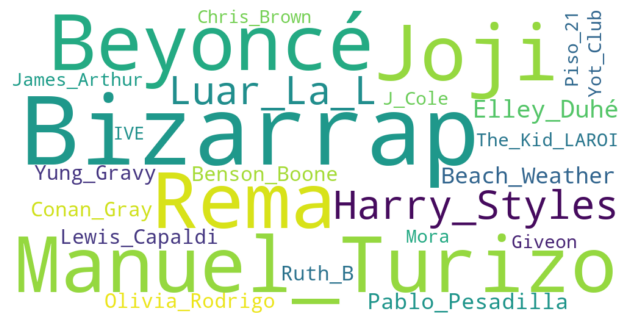

In [10]:
popular_artists = df['popularity'].groupby(df['artists']).mean()
most_popular_artists = popular_artists.sort_values(ascending = False).head(25)

text = list(most_popular_artists.index)
text2 = [text[i].replace(' ', '_').replace('.', '') for i in range(len(text))]
string = (" ").join(text2)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

El Word Cloud muestra los 25 artistas más populares del dataset original, la mayoría de ellos son artistas vigentes y de gran difusión en la actualidad. Esto ilustra en gran medida los gustos de los oyentes, dando una idea aproximada de los artistas que más serán solicitados al algoritmo de recomendación de canciones. 

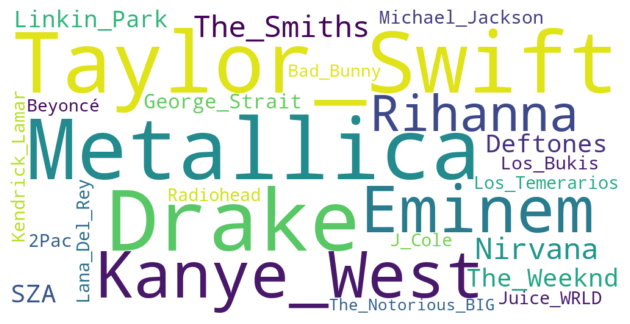

In [11]:
alltime_popular_artists = df_api['artists'].value_counts().head(25)

text = list(alltime_popular_artists.index)
text2 = [text[i].replace(' ', '_').replace('.', '') for i in range(len(text))]

string = (" ").join(text2)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

Por otro lado, este Word Cloud obtenido a partir del dataset obtenido por medio de la API muestra los 25 artistas más populares entre los años 1980 y 2022. Esta muestra artistas de diferentes décadas, tales como Metallica, Nirvana, Michael Jackson y Taylor Swift. Estos artistas son siempre escuchados y de relevancia.

#### 4.1.3. Canciones <a class="anchor" id="pop_canciones"></a>

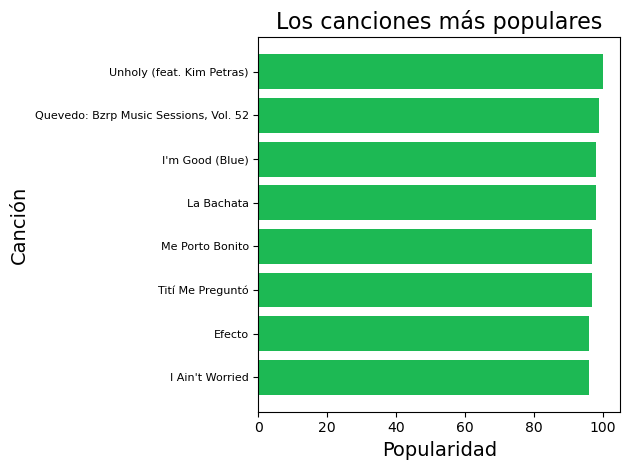

In [12]:
df2 = df[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(20)

plt.barh(df2['track_name'][::-1], df2['popularity'][::-1], color = '#1DB954')
plt.xlabel('Popularidad', fontsize = 14)
plt.ylabel('Canción', fontsize = 14)
plt.yticks(fontsize = 8)
plt.title('Los canciones más populares', fontsize = 16)
plt.tight_layout()
plt.show()

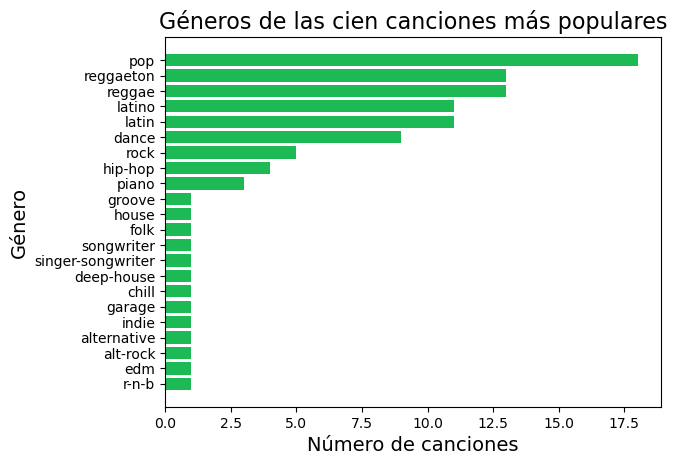

In [13]:
df3 = df[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(100)
popular_songs_genre = df3['track_genre'].value_counts()

plt.barh(popular_songs_genre.index[::-1], popular_songs_genre[::-1], color = '#1DB954')
plt.xlabel('Número de canciones', fontsize = 14)
plt.ylabel('Género', fontsize = 14)
plt.title('Géneros de las cien canciones más populares', fontsize = 16)
plt.show()

Por otro lado, si analizamos las canciones más populares y los géneros de dichas canciones, encontramos que en su mayoría que estas canciones pertenecen a los géneros "pop", "dance", "latin" y "latino". Estas canciones, en general son buscadas por sus altos valores de "valence" y "danceability", es decir, son canciones muy bailables y que en general transmiten emociones positivas.  

### 4.2. Duración <a class="anchor" id="duracion"></a>

In [14]:
# Pasamos de ms a minutos
df['duration_min'] = (df['duration_ms']/(60 * 1000)).round(2)
df.drop('duration_ms', axis = 1, inplace = True)

df_api['duration_min'] = (df_api['duration_ms']/(60 * 1000)).round(2)
df_api.drop('duration_ms', axis = 1, inplace = True)

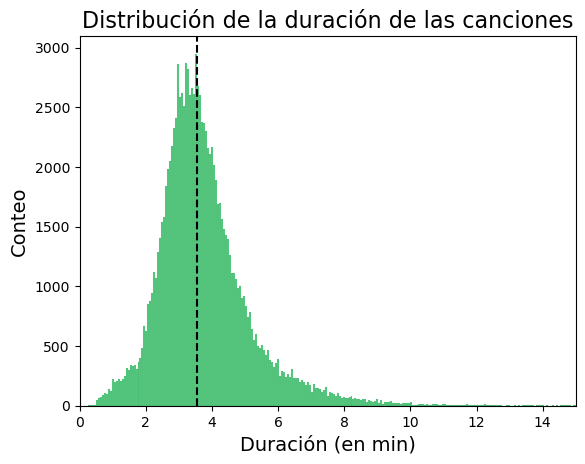

In [15]:
sns.histplot(df['duration_min'], color = '#1DB954')
plt.axvline(median(df['duration_min']), c = 'black', ls = '--')
plt.xlim(0, 15)
plt.xlabel('Duración (en min)', fontsize = 14) 
plt.ylabel('Conteo', fontsize = 14) 
plt.title('Distribución de la duración de las canciones', fontsize = 16)
plt.show()

La duración de las canciones presenta esta distribución, con una mediana en torno a los 3,6 minutos, aunque hay canciones que superan holgadamente los 15 minutos que abarca este gráfico.

### 4.3. Bailabilidad <a class="anchor" id="baile"></a>

Se clasificaron las canciones como bailables (danceable) o no, fijanto arbitrariamente como bailables a aquellas canciones con valores de "danceablity" mayores a 0,75.

In [16]:
# Clasificamos según danceablility
group_names = ['No bailable', 'Bailable']
df['danceable'] = pd.cut(df['danceability'], [0, 0.75, 1], labels = group_names, include_lowest = True)
df_api['danceable'] = pd.cut(df_api['danceability'], [0, 0.75, 1], labels = group_names, include_lowest = True)

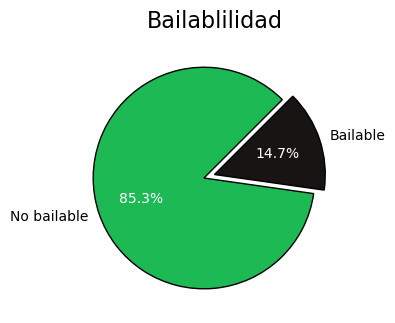

In [17]:
plt.figure(figsize = (4,4))
_, _, autotexts = plt.pie(df.groupby('danceable').size(), labels = ('No bailable', 'Bailable'), explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%', colors = ['#1DB954', '#191414'], wedgeprops = {"edgecolor" : "black", 'linewidth': 1})
for ins in autotexts:
    ins.set_color('white')

plt.title('Bailablilidad', fontsize = 16)
plt.tight_layout()
plt.show()

Se observa que sólo un 14,5 % de las canciones del dataset original se clasificaron como bailables, sin embargo, estas canciones son las más populares. Esto quiere decir, que las canciones más demandas al servicio muy probablemente son las que más se disfrutan bailando, pero que sin embargo estás canciones no contienen a todo el universo de las canciones solicitadas.

### 4.4. Palabra hablada (Speechiness) <a class="anchor" id="hablada"></a>

"Speechiness" detecta la presencia de palabra hablada. Mientras más palabra hablada posea (talk show, audiobook, poesía), más cerca de 1 estará el valor. Valores entre 0.33 y 0.66 describen piezas musicales con carácter mixto entre música y palabra hablada. Valores por debajo de 0.33 representan música y otros temas con voz cantada. Con tales rangos crearemos una clasificación cualitativa, con la idea de simplificar el análisis.

In [18]:
# Clasificamos según speechiness
group_names = ['Music', 'Mixed', 'Spoken']
df['speechiness'] = pd.cut(df['speechiness'], [0, 0.33, 0.66, 1], labels = group_names, include_lowest = True)
df_api['speechiness'] = pd.cut(df_api['speechiness'], [0, 0.33, 0.66, 1], labels = group_names, include_lowest = True)

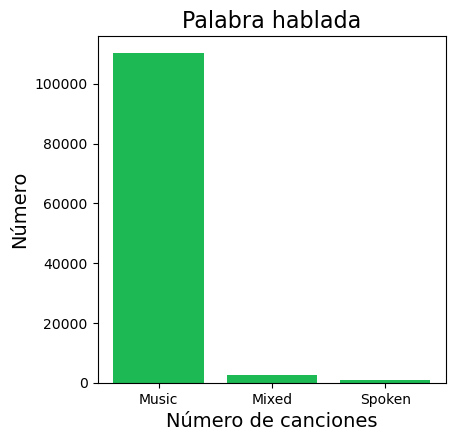

In [19]:
plt.figure(figsize = (4.5, 4.5))
plt.bar(df.groupby('speechiness').size().index, df.groupby('speechiness').size(), color = '#1DB954')    
plt.xlabel('Número de canciones', fontsize = 14)
plt.ylabel('Número', fontsize = 14)
plt.title('Palabra hablada', fontsize = 16)
plt.show()

La gran mayoría de las canciones que componen el dataset original poseen voz cantada, sólo una fracción minoritaria está compuesta por piezas en las que tiene presencia de palabra hablada, es decir, piezas tales como rap, poesía, etc.

### 4.5. Letras explicítas <a class="anchor" id="explicito"></a>

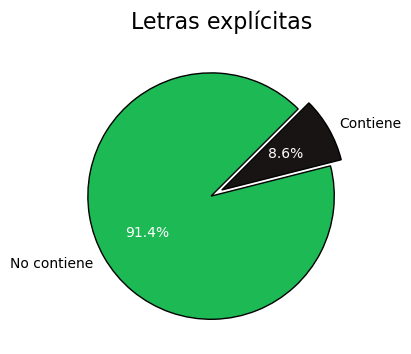

In [20]:
plt.figure(figsize = (4,4))
_, _, autotexts = plt.pie(df.groupby('explicit').size(), labels = ('No contiene', 'Contiene'), explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%', colors = ['#1DB954', '#191414'], wedgeprops = {"edgecolor" : "black", 'linewidth': 1})
for ins in autotexts:
    ins.set_color('white')

plt.title('Letras explícitas', fontsize = 16)
plt.show()

Se encuentra que el 8.6 % de las canciones poseen letras explícitas. Esta es otra variable a considerar, filtrar las canciones no explícitas de las explícitas es de utilidad para padres que buscan no exponer a sus hijos de corta edad a letras no aptas para menores.

### 4.6. Evolucion con el tiempo <a class="anchor" id="tiempo"></a>

In [21]:
year, danceability, energy, tempo, valence = [], [], [], [], []

for i in range(1980, 2023):
    year.append(i)
    danceability.append(np.median(df_api.loc[df_api['year'] == i]['danceability']))
    energy.append(np.median(df_api.loc[df_api['year'] == i]['energy']))
    tempo.append(np.median(df_api.loc[df_api['year'] == i]['tempo']))
    valence.append(np.median(df_api.loc[df_api['year'] == i]['valence']))

df_api_avg = pd.DataFrame({'year':year, 'danceability':danceability, 'energy':energy, 'tempo':tempo, 'valence':valence})

Se creó un dataset nuevo, el cual está compuesto por las medianas de las variables "danceability", "energy", "tempo" y "valence" de las canciones de cada año del dataset obtenido por la API.

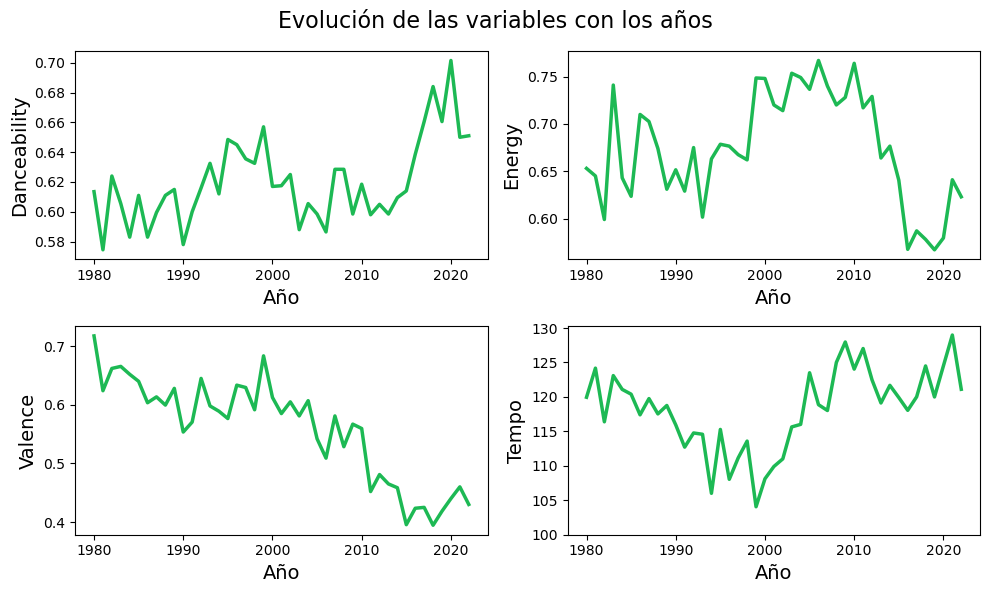

In [22]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))

axs[0,0].plot(df_api_avg['year'], df_api_avg['danceability'], c = '#1DB954', lw = 2.5)
axs[0,1].plot(df_api_avg['year'], df_api_avg['energy'], c = '#1DB954', lw = 2.5)
axs[1,0].plot(df_api_avg['year'], df_api_avg['valence'], c = '#1DB954', lw = 2.5)
axs[1,1].plot(df_api_avg['year'], df_api_avg['tempo'], c = '#1DB954', lw = 2.5)

variable = ['Danceability', 'Energy', 'Valence', 'Tempo']

for i, ax in enumerate(axs.flat):
    ax.set_xlabel('Año', fontsize = 14)
    ax.set_ylabel(f'{variable[i]}', fontsize = 14)
    
axs[1,1].set_yticks(np.arange(100, 131, 5))
    
fig.suptitle('Evolución de las variables con los años', fontsize = 16)

plt.tight_layout()
plt.show()

Se observa que estas variables tuvieron cambios progresivos con el pasar de los años. En líneas generales, parece haber un cambio en las tendencias de las variables "danceability", "energy" y "valence" en los años 2010. En dicha década las canciones aumentaron las medianas de dichas variables, probablemente debido al éxito relativamente reciente de los géneros de música pop, hip-hop, latino y similares. Por otro lado, la variable "tempo" tuvo un notable aumento en el año 2000 para luego estancarse durante el rango 2005 al 2020.

### 4.7. Análisis univariado <a class="anchor" id="histogramas"></a>

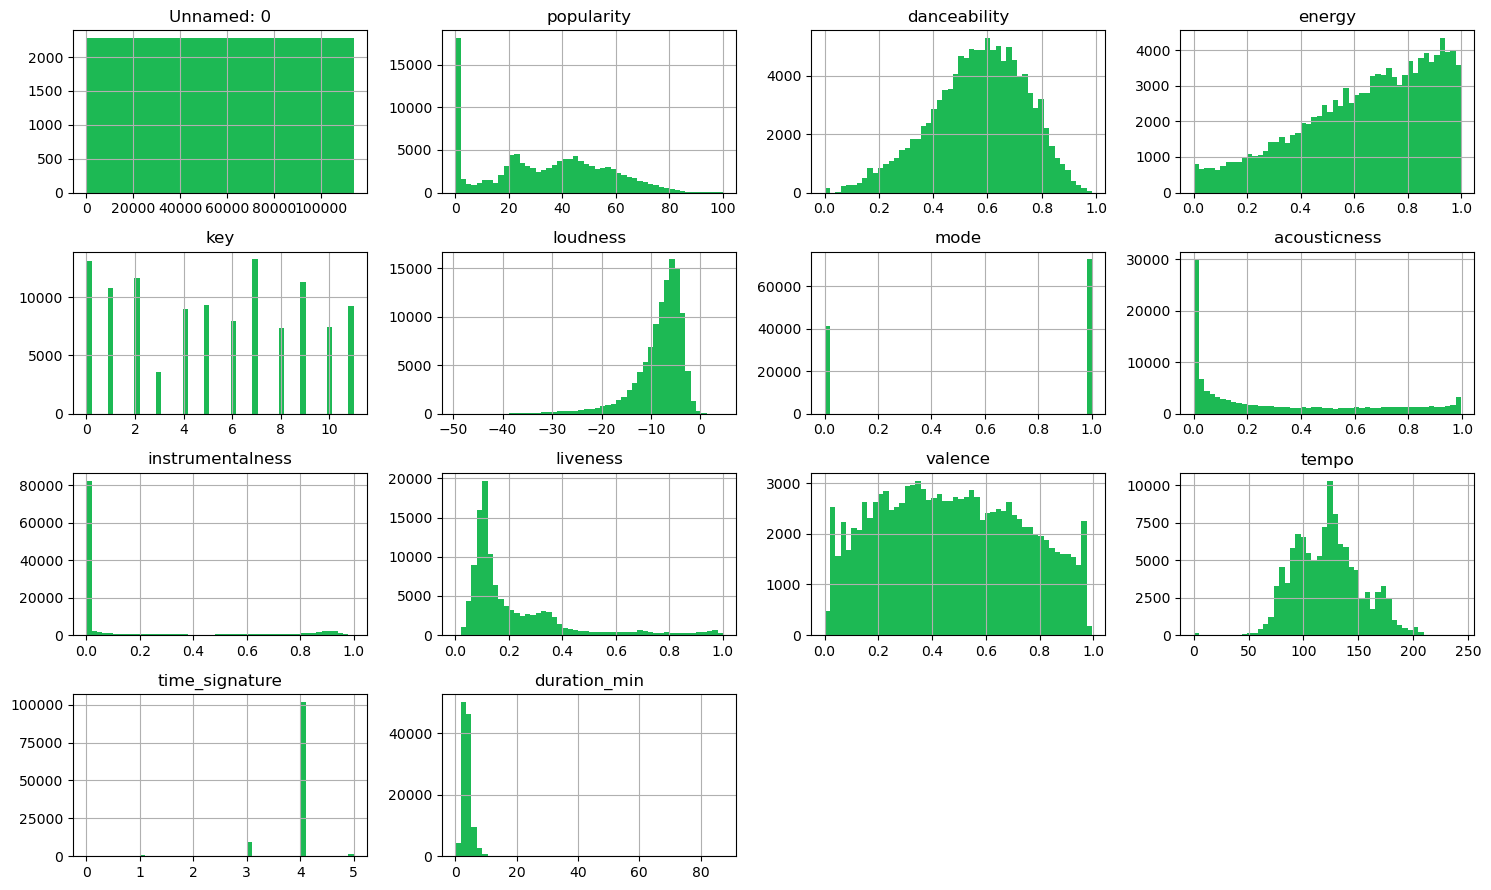

In [23]:
df.hist(bins = 50, figsize = (15, 9), color = '#1DB954')
plt.tight_layout()
plt.show()

Los histogramas de las variables numéricas del dataset muestran un gran abanico de distribuciones, es por esto que deberá tenerse especial cuidado a la hora de plantear la estandarización de estos datos. Variables como "tempo" y "danceablility" ya tienen un comportamiento similar al normal o distribuciones similares a log-normal ("loudness", "liveness") y otras variables presentan valores discretos.

### 4.8. Análisis bivariado <a class="anchor" id="puntos"></a>

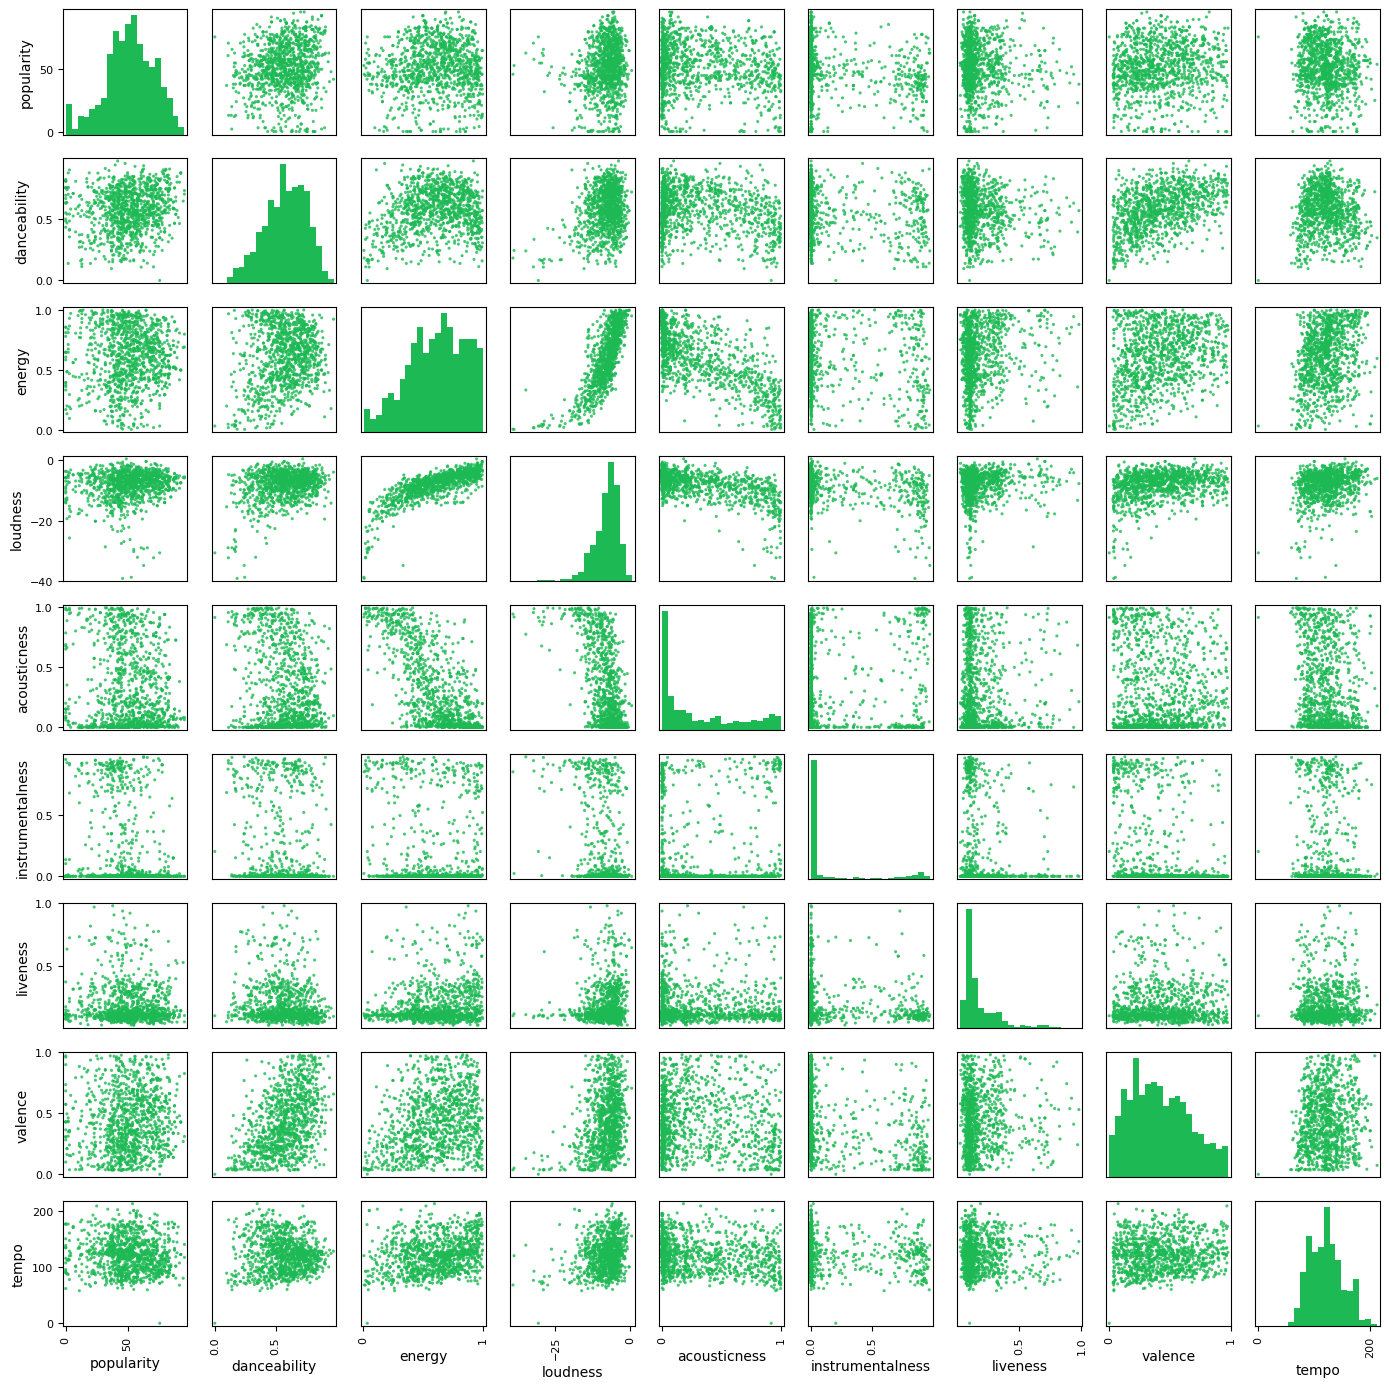

In [24]:
col_sel = ['popularity', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

pd.plotting.scatter_matrix(df[col_sel].iloc[::100,:], color = '#1DB954', figsize=(14,14), \
                           marker='.', hist_kwds={'color':['#1DB954'], 'bins': 20}, s=20, alpha =.8)

plt.tight_layout()
plt.show()

El gráfico anterior presenta gráficos tipo scatterplot entre todos los pares de variables numéricas presentes en el dataset. Este gráfico muestra resumidamente que existen pares de variables que presentan correlaciones de distinto grado, algunas presentan fuerte correlación con lo que se podría pensar en disminuir el número de variables a la hora de entrenar el algoritmo de clasificación. Sin embargo, en otros casos la correlación es débil, indicando cierta vinculación entre ellas pero que no ameritaría la eliminación de dichas variables.

### 4.9. Correlaciones <a class="anchor" id="correlaciones"></a>

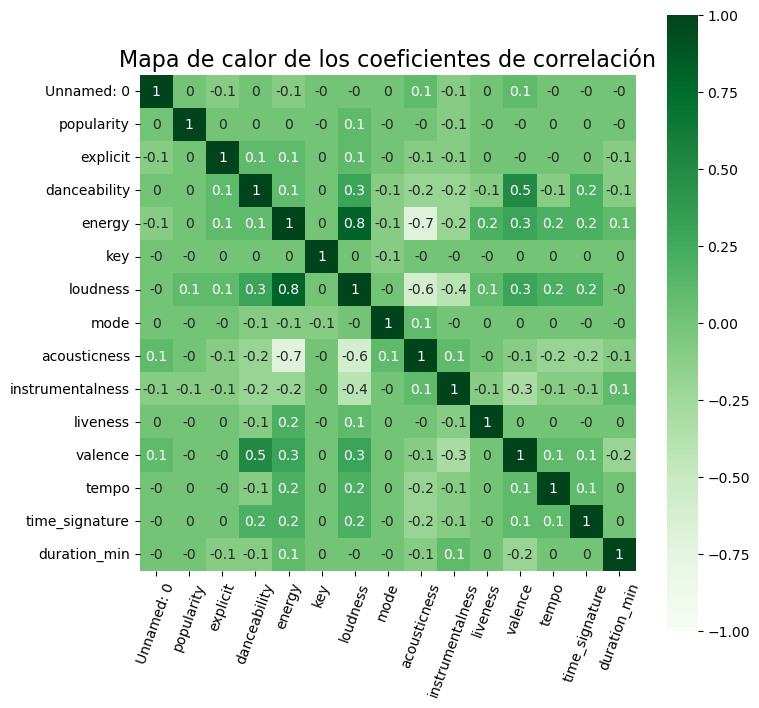

In [25]:
plt.figure(figsize = (8,8))
plt.axis('scaled')
sns.heatmap(df.corr().round(1), vmin=-1, vmax=1, cmap = "Greens", cbar = True, annot = True)
plt.xticks(rotation = 70)
plt.title('Mapa de calor de los coeficientes de correlación', fontsize = 16)
plt.show()

Las correlaciones entre pares de variables del dataset se visualizan con este mapa de calor. Algunas pares presentan fuerte correlación, en torno a ± 0.8 (por ejemplo: energy y loudness, energy y acousticness), sin embargo, se observa en mayor proporción correlaciones nulas o muy bajas (< ± 0.2). Se podría evaluar la posibilidad de disminuir el número de variables eliminando aquellas que posean tanto correlaciones muy altas como muy bajas.

## 5. Insights y recomendaciones <a class="anchor" id="insights"></a>
---

En función del análisis exploratorio del dataset se presentan los siguientes insights:

- Las canciones más populares pertenecen, en su gran mayoría, a los géneros pop, hip-hop y latino. En consecuencia, los artistas más populares son los que se dedican a los mencionados géneros. 

- Además de los artistas más populares del momento existen artistas de décadas pasadas que permanecen vigentes y escuchados actualmente.

- Las canciones más elegidas por los usuarios son aquellas que transmiten mayor energía, emociones típicamente calificadas como positivas y voluntad de bailar. Sólo el 15 % de las canciones del dataset original son consideradas bailables.

- Casi con exclusividad las piezas musicales poseen voz cantada, sólo un número menor poseen palabra hablada. 

- Menos del 9 % de las canciones poseen letras explícitas, no aptas para menores.

- Las variables que caracterizan a las canciones evolucionan con el pasar de los años. En la década del 2010 se detectaron cambios de tendencia en estas variables.

Y a su vez, en respuesta a los insights, se plantean las recomendaciones que continúan:

- Para atraer a oyentes jóvenes, entre 18 y 30 años, la plataforma debe poseer un amplio repertorio de canciones bailables, que transmitan emociones positivas y energía. Los géneros pop, hip-hop, latinos, entre otros, gozan de popularidad puesto que cumplen con las características mencionadas.

- Se recomienda explorar la posibilidad de ofrecer un servicio diferenciado para menores de edad. Este rango etario posee preferencias musicales similares a los jóvenes de entre 18 y 30 años. Este servicio diferenciado debe poseer la opción de que los padres puedan filtrar las canciones con letras violentas y/o explícitas.

- Por otro lado, a los fines de convencer y/o retener la audiencia de más edad, el servicio Spotify debe ofrecer canciones de artistas consagrados que permanecen vigentes. Artistas tales como Metallica, Michael Jackson, The Smith, 2Pac, Eminem, etcétera, son de géneros dispares y de diferentes décadas pero que figuran en los tops de popularidad. 

- Géneros musicales que tuvieron su pico de popularidad en décadas pasadas pero que siguen siendo muy escuchados podrían beneficiarse del influjo de artistas nuevos que siguen produciendo música en estos géneros. Spotify podría dar más visibilidad a dichos artistas para ofrecer novedades para atraer a posibles clientes que gusten de dicha música.

## 6. Data Cleaning <a class="anchor" id="cleaning"></a>
---

El funcionamiento de los algoritmos depende de poseer información libre de valores nulos y repetidos, las siguientes dos subsecciones se focalizan rápidamente en dichos asuntos.

### 6.1. Datos nulos <a class="anchor" id="nulos"></a>

In [26]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_min        0
danceable           0
dtype: int64

In [27]:
df = df.dropna()

### 6.2. Datos duplicados <a class="anchor" id="duplicados"></a>

In [28]:
df.duplicated(subset = ['track_id']).value_counts()

False    89740
True     24259
dtype: int64

In [29]:
df = df.drop_duplicates(subset = ['track_id'])

El total de canciones repetidas en el dataset original asciende a 24259, de un total de 114.000, lo cual es el 21% del dataset, un número realmente alto. Sin embargo, al igual que con los valores tipo NaN, borramos los valores repetidos en el dataset. El dataset extraído desde la API posee intrínsecamente valores duplicados, dado que se creó a partir de las canciones más populares de cada año, es decir, hay canciones que fueron populares durante más de un año.

### 6.3. Datos extremos <a class="anchor" id="outliers"></a>

Existen numerosos outliers en el dataset, el gráfico de cajas inmediatamente abajo ilustra tal situación. Se buscó eliminar sólo aquellos que sean muy distorsivos en las distribuciones, evitando reducir severamente el número de entradas en el dataset.

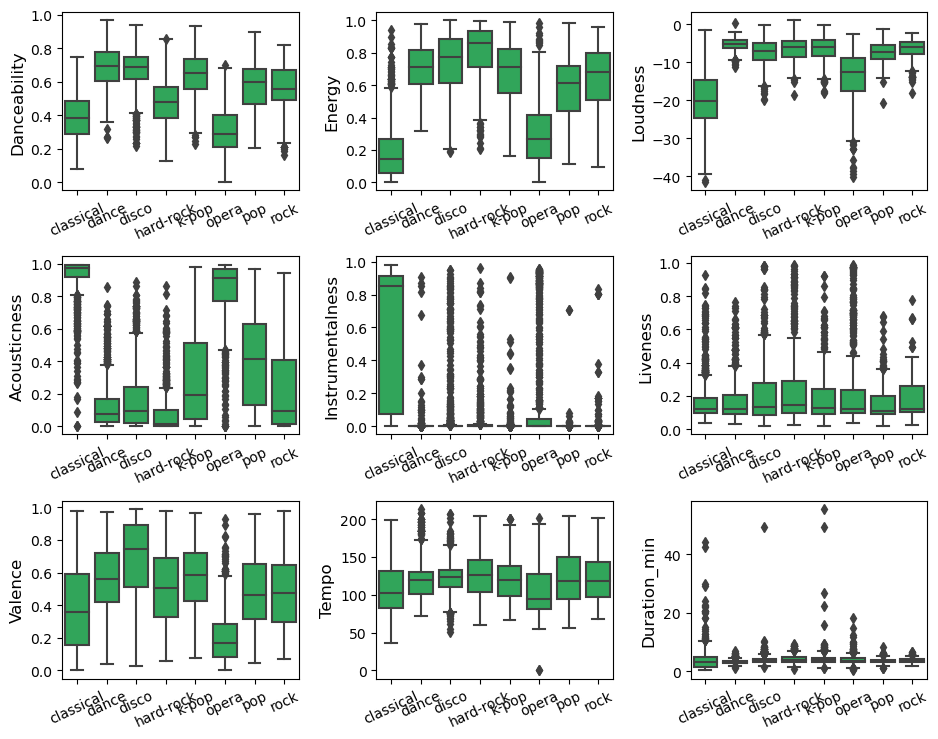

In [30]:
df_sel = df[df['track_genre'].isin(['classical', 'opera', 'rock', 'hard-rock', 'pop', 'k-pop', 'dance', 'disco'])]

numerical_columns = df.select_dtypes(include = ['number']).columns
l = [i for i in numerical_columns if i not in ['Unnamed: 0', 'popularity', 'key', 'mode', 'time_signature']]

plt.figure(figsize = (9.5, 7.5))
      
for x, column in zip(range(12), df_sel[l]):
    plt.subplot(int(len(l)/3), 3, x+1)
    sns.boxplot(data = df_sel, y = column, x = df_sel['track_genre'], color = '#1DB954') 
    plt.xticks(rotation = 25)
    plt.xlabel("")
    plt.ylabel(l[x].capitalize(), fontsize = 12)
    
plt.tight_layout()

In [31]:
df_filtro = df[((np.abs(stats.zscore(df['duration_min'])) < 3) & (np.abs(stats.zscore(df['danceability'])) < 3))]

Sólo fueron removidos los outliers de las variables "duration_min" y "danceability", dejando fuera aquellos registros que se aparten en ± 3σ (desviaciones estándar). Esto supone que la distribución es normal, lo que no se cumple para la mayoría de las variables. Abajo se muestran de nuevo los gráficos de caja, pero con los outliers eliminados.

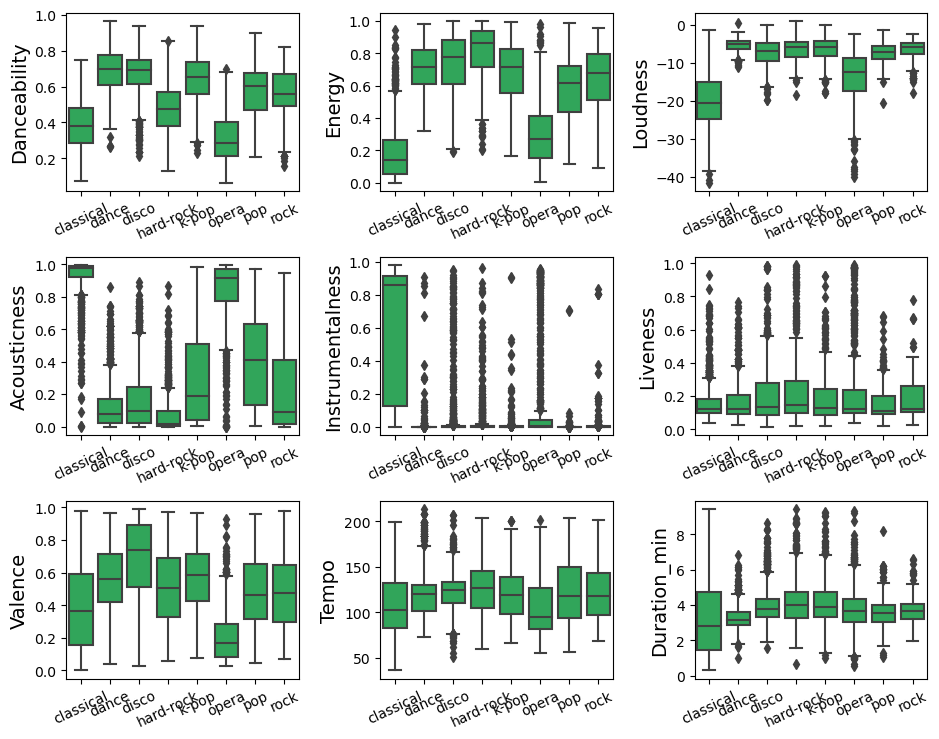

In [32]:
df_sel = df_filtro[df_filtro['track_genre'].isin(['classical', 'opera', 'rock', 'hard-rock', 'pop', 'k-pop', 'dance', 'disco'])]

plt.figure(figsize = (9.5, 7.5))
      
for x, column in zip(range(12), df_sel[l]):
    plt.subplot(int(len(l)/3), 3, x+1)
    sns.boxplot(data = df_sel, y = column, x = df_sel['track_genre'], color = '#1DB954') 
    plt.xticks(rotation = 25)
    plt.xlabel("")
    plt.ylabel(l[x].capitalize(), fontsize = 14)
    
plt.tight_layout()

## 7. Data Wrangling <a class="anchor" id="wrangling"></a>
---

In [33]:
df_semi_proc = df_filtro.copy()

In [34]:
def wrangling(data):
    
    # Se eliminan las columnas Unnamed:0 y track_id o track, según sea el caso
    if 'track_id' in data.columns:
        data.drop(['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'danceable'], axis = 1, inplace = True)
        
    else:
        data.drop(['Unnamed: 0', 'track', 'danceable'], axis = 1, inplace = True)

    # Expresamos el volumen en números positivos
    data['loudness_db'] = - data['loudness']
    data.drop('loudness', axis = 1, inplace = True)

    return data

In [35]:
df = wrangling(df_filtro)
df_api = wrangling(df_api)

Se eliminaron las columnas "Unnamed: 0", "track_id" que sólo indica el número de fila y que identifica la canción en el servicio Spotify, respectivamente. Se expresó la duración de las canciones en minutos (en lugar de milisegundos) y se modificó la columna "loudness" para que informe valores positivos. En el caso que una canción posea más de un intérprete, la columna "artists" presenta a los artistas separados por punto y coma (;), por ello se separa las artistas y se selecciona sólo el principal.

## 8. Preprocesado de variables <a class="anchor" id="preprocesado"></a>
---

In [36]:
df_proc = df.copy()

In [37]:
ord = preprocessing.OrdinalEncoder()

col_categoricas = df_proc.select_dtypes(include=['object', 'bool', 'category']).columns

for i in col_categoricas:
    df_proc[col_categoricas] = ord.fit_transform(df_proc[col_categoricas])

Amplicamos un encoder a todas las variables categóricas presentes en el dataset.

In [38]:
X = df_proc.drop(['track_genre'], axis = 1) 
y = df_proc['track_genre']

Definimos "track_genre" como la variable objetivo.

In [39]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

Como se observó en la sección 4.7 (Análisis univariado), hay variables que poseen diferentes distribuciones y rangos de valores. Por ejemplo "tempo" posee valores entre 0 y 250 y otras variables corren entre 0 y 1. Esto puede darle un peso desporporcionado a la variable "tempo", por ello es que se realiza un escalado a estas variables para que adopten valores entre 0 y 1.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

Por último, separamos en el dataset en los conjuntos de entrenamiendo y de evaluación.

## 9. Aprendizaje automático: Clasificación <a class="anchor" id="clasificacion"></a>
---

### 9.1. Reducción de la dimensionalidad <a class="anchor" id="dimensionalidad"></a>

Se disponen de varias formas de seleccionar variables o reducirlas, en esta entrega se utilizaron los métodos de evaluación de la colinealidad, la selección por importancia de variables (usando bosques de decisión), la selección secuencial y el análisis por componentes principales.

#### Colinealidad

El análisis por colinealidad busca apartar aquellas variables que presenten coeficientes de correlación lineal (R) que superen un cierto umbral, con otras variables.

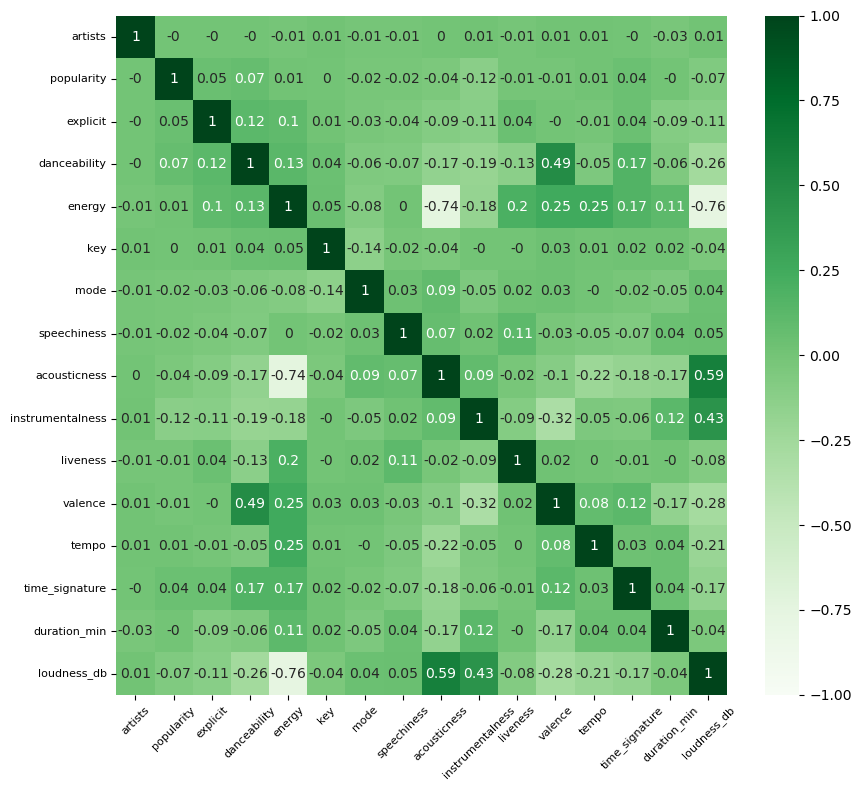

In [41]:
plt.figure(figsize=(9, 8))
sns.heatmap(X_scaled_df.corr().round(2), vmin=-1, vmax=1, cmap = "Greens", cbar = True, annot=True)
plt.xticks(fontsize = 8, rotation=45) 
plt.yticks(fontsize = 8) 
plt.tight_layout()
plt.show()

El mapa de calor vislumbra rápidamente que no hay variables que presenten valores excesivamente altos de R. Sin embargo, buscaremos eliminar aquellas variables que superen el umbral de 0,7.

In [42]:
corr_matrix = X_scaled_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
seleccion = [column for column in upper.columns if any(upper[column] > 0.7)]

df_colinear = X_scaled_df.copy()
df_colinear = df_colinear.drop(df_colinear[seleccion], axis = 1)

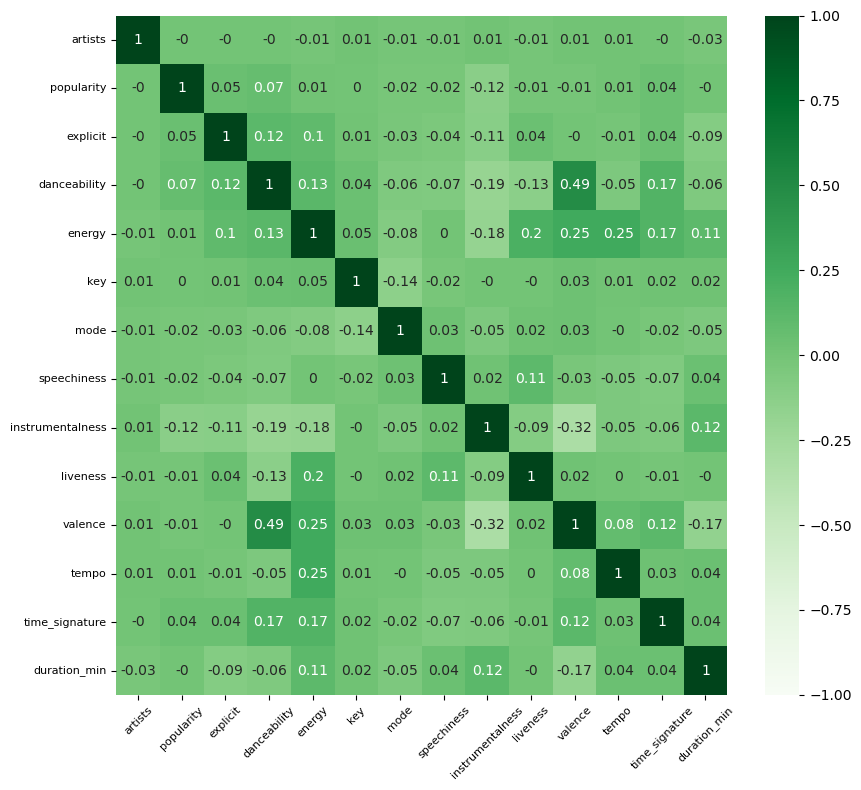

In [43]:
plt.figure(figsize=(9, 8))
sns.heatmap(df_colinear.corr().round(2), vmin=-1, vmax=1, cmap = "Greens", cbar = True, annot=True)
plt.xticks(fontsize = 8, rotation=45) 
plt.yticks(fontsize = 8) 
plt.tight_layout()
plt.show()

El mapa de calor inmediatamente anterior, obtenido a partir del dataset sin correlaciones altas muestra, justamente, correlaciones por debajo del umbral elegido.

#### Importancia de las variables

Este método hace uso de un bosque de decisión para evaluar la importancia de las variables en una tarea artificial de regresión, empleando alguna medida de la calidad de la separación en ramas.

In [44]:
forest = RandomForestClassifier(max_depth = 10, random_state = 0, n_jobs = -1)

forest.fit(X_train, y_train)
impor_variable = forest.feature_importances_

Aplicamos un Random Forest y obtenemos la importancia de las variables a partir del método "feature_importances_".

In [45]:
importancias = pd.DataFrame({'feature': list(X.columns), 'importance': impor_variable}).sort_values('importance', ascending = False)
importancias

,feature,importance
1,popularity,0.235136
8,acousticness,0.106292
3,danceability,0.088881
14,duration_min,0.085035
9,instrumentalness,0.074777
0,artists,0.066260
15,loudness_db,0.066122
11,valence,0.065645
4,energy,0.063058
12,tempo,0.048507


Se observa que unas pocas variables poseen importancia significativa, mientras muchas otras no significativamente contribuyen al poder predictivo. Se eliminaran aquellas variables de escasa contribución.

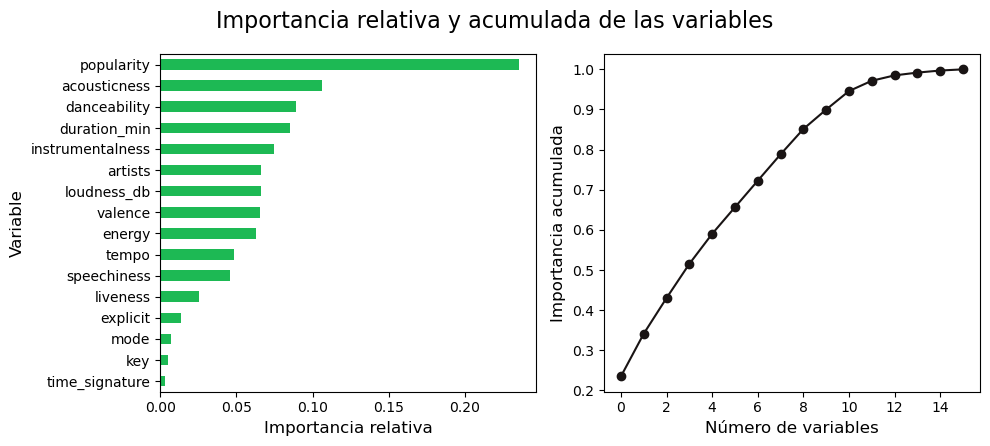

In [46]:
importancias['cumulative_importance'] = np.cumsum(importancias['importance'])

fig, axes = plt.subplots(1,2, figsize = (10, 4.5))

importancias.sort_values('importance', ascending=True).plot.barh(y='importance', x='feature', legend=False, color = '#1DB954', ax = axes[0])
axes[1].plot(list(range(len(importancias))), importancias['cumulative_importance'], '-o', color = '#191414')

axes[0].set_xlabel('Importancia relativa', fontsize = 12); axes[0].set_ylabel('Variable', fontsize = 12)
axes[1].set_xlabel('Número de variables', fontsize = 12); axes[1].set_ylabel('Importancia acumulada', fontsize = 12)

plt.suptitle('Importancia relativa y acumulada de las variables', fontsize = 16)
plt.tight_layout()
plt.show()

In [47]:
sel_columnas = importancias[importancias.importance < 0.05].feature.values

df_import = X_scaled_df.drop(columns = sel_columnas)
df_import.head()

,artists,popularity,danceability,energy,acousticness,instrumentalness,valence,duration_min,loudness_db
0,-0.589941,1.928767,0.641306,-0.686128,-0.874049,-0.529782,0.928994,0.077073,-0.328866
1,-1.380779,1.055114,-0.826346,-1.841639,1.767057,-0.529768,-0.781896,-0.923988,1.706407
2,-0.380131,1.152186,-0.723152,-1.085661,-0.347486,-0.529786,-1.343282,-0.167631,0.250922
3,-0.105323,1.831695,-1.709231,-2.258406,1.710788,-0.529566,-1.255446,-0.271445,1.954776
4,-1.152596,2.365594,0.308791,-0.756634,0.419554,-0.529786,-1.163791,-0.315936,0.240638


#### Análisis de componentes principales

PCA es una técnica de reducción de dimensionalidad, la cual consiste en la determinación de un espacio de menor dimensión, que retiene la mayor parte de la información. Busca encontrar nuevas variables, llamadas componentes principales (PC), ortogonales entre sí y que son combinaciones lineales de las variables originales. A lo largo de estas componentes, la varianza es máxima.

La varianza explicada es del 28.45 %.


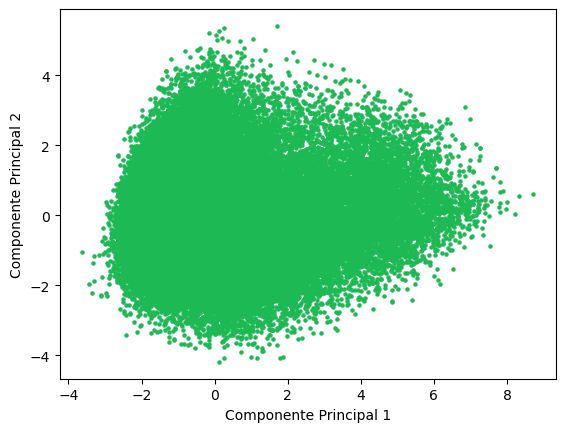

In [48]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
total_varianza = np.sum(pca.explained_variance_ratio_).round(4)

print(f'La varianza explicada es del {round(100*total_varianza, 2)} %.')
    
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 5, color = '#1DB954')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

A los fines de explorar el funcionamiento de PCA, se aplicó una reducción de la dimesionalidad a sólo dos componentes. Estos componentes sólo dan cuenta del 28.45 % de la varianza de los datos. Por lo que se requieren de mayor número de PC. Se hace un loop for variando el número de PC y se determina en cada caso la varianza explicada.

In [49]:
varianza = []

for i in range(1,16):
    pca = PCA(n_components = i)
    X_pca = pca.fit_transform(X_scaled)
    varianza.append(np.sum(pca.explained_variance_ratio_))

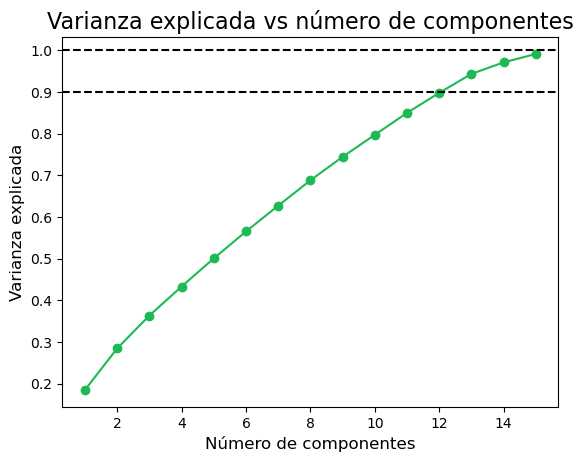

In [50]:
plt.plot(list(range(1,16)), varianza, '-o', color = '#1DB954')
plt.xlabel('Número de componentes', fontsize = 12); 
plt.ylabel('Varianza explicada', fontsize = 12)
plt.axhline(1, color = 'black', linestyle = '--')
plt.axhline(0.90, color = 'black', linestyle = '--')
plt.title('Varianza explicada vs número de componentes', fontsize = 16)

plt.show()

Se observa gráficamente que la varianza aumenta rápidamente con el número de PC (en este dataset, en otros la situación puede ser distinta) para luego amesetarse tendiendo a 1. Tomaremos el número de PC suficiente para dar cuenta el 95 % de la varianza, es decir, seis componentes, con el cual definimos el dataset "df_pca".

In [51]:
i = 12
pca = PCA(n_components = i)
X_pca = pca.fit_transform(X_scaled)
columnas = ["PC" + str(i+1) for i in range(X_pca.shape[1])]

df_pca = pd.DataFrame(data = X_pca, columns = columnas)

### 9.2. Selección de variables <a class="anchor" id="seleccion"></a>

Se evaluó, de forma secuencial, cuales son las variables que más peso poseen en el dataset, para ello se utilizó el algoritmo Sequential Feature Selector junto al algoritmo KNN.

In [52]:
X2 = X_scaled_df.iloc[::10,:] 
y2 = y.iloc[::10]

In [53]:
knn = KNeighborsClassifier(n_neighbors = 10, n_jobs = -1)

seq = {}
numero_variables = [3, 5, 7, 9, 11, 13, 15]

for i in numero_variables:
    sfs = SequentialFeatureSelector(knn, n_features_to_select = i, n_jobs = -1)
    sfs.fit(X2, y2)
    seq[f'var_{i}'] = X2.columns[sfs.get_support()]
    
    print(f'Las {i} variables seleccionadas son: \n', list(seq[f'var_{i}']), '\n')

Las 3 variables seleccionadas son: 
 ['artists', 'explicit', 'speechiness'] 

Las 5 variables seleccionadas son: 
 ['artists', 'explicit', 'speechiness', 'instrumentalness', 'time_signature'] 

Las 7 variables seleccionadas son: 
 ['artists', 'popularity', 'explicit', 'mode', 'speechiness', 'instrumentalness', 'time_signature'] 

Las 9 variables seleccionadas son: 
 ['artists', 'popularity', 'explicit', 'danceability', 'energy', 'mode', 'speechiness', 'instrumentalness', 'time_signature'] 

Las 11 variables seleccionadas son: 
 ['artists', 'popularity', 'explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'time_signature', 'duration_min'] 

Las 13 variables seleccionadas son: 
 ['artists', 'popularity', 'explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'time_signature', 'duration_min', 'loudness_db'] 

Las 15 variables seleccionadas son: 
 ['artists', 'popularity', 'explicit', 'danceab

Se utilizó el algoritmo KNN para realizar el proceso de Feature Selection. Se seleccionaron 3, 5, 7, 9, 11, 13 y 15 variables en cada caso, la cual se denominan Sprint 3, Sprint 5, ..., y Sprint 11. Se aplicó sólo la dirección "forward". A continuación, se utilizaron modelos de KNN usando las variables seleccionadas en cada caso y se evaluarán las métricas.

In [54]:
knn = KNeighborsClassifier(n_neighbors = 10, n_jobs = -1)

accuracy, recall, f1 = [], [], []

for i in numero_variables:
    col = seq[f'var_{i}']
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_df[col], y, random_state = 42)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred, average = 'macro'))
    f1.append(f1_score(y_test, y_pred, average = 'macro'))
    
Model = [f'Sprint {2*i+1}' for i in range(1, len(numero_variables) + 1)]
sequencial = pd.DataFrame({'Modelo': Model, 'Accuracy': accuracy, 'Recall': recall, 'F1': f1})
sequencial.round(2)

,Modelo,Accuracy,Recall,F1
0,Sprint 3,0.62,0.59,0.59
1,Sprint 5,0.39,0.38,0.38
2,Sprint 7,0.26,0.25,0.24
3,Sprint 9,0.25,0.23,0.23
4,Sprint 11,0.28,0.26,0.26
5,Sprint 13,0.30,0.28,0.27
6,Sprint 15,0.30,0.27,0.27


Se elige el Sprint 3 puesto que posee las mejores métricas.

In [55]:
X_3 = seq['var_3'].values

df_sequencial = X_scaled_df[X_3]
df_sequencial.head()

,artists,explicit,speechiness
0,-0.589941,-0.307148,0.087575
1,-1.380779,-0.307148,0.087575
2,-0.380131,-0.307148,0.087575
3,-0.105323,-0.307148,0.087575
4,-1.152596,-0.307148,0.087575


#### Comparación de métodos de selección de variables

En esta sección se compararán se evaluará como responde el algoritmo de clasificación KNN en los dataframes que fueron obtenidos por los diferentes métodos de selección de variables y reducción de la dimensionalidad. No sólo compararemos las métricas de bondad de ajuste sino que también tendremos en cuenta el tiempo de cómputo requerido para cada dataset.

In [56]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

accuracy, recall, f1, tiempo = [], [], [], []

for data_frame in [X_scaled_df, df_colinear, df_import, df_sequencial, df_pca]:
    start_time = time.time()
    
    X_train, X_test, y_train, y_test = train_test_split(data_frame, y, random_state = 42)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    accuracy.append(accuracy_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred, average = 'macro'))
    f1.append(f1_score(y_test, y_pred, average = 'macro'))
    
    tiempo.append(execution_time)

In [57]:
comparacion = pd.DataFrame({'Modelo': ['Original', 'Correlaciones', 'Importancia', 'Secuencial', 'PCA'], 
                            'Accuracy': accuracy, 
                            'Recall': recall, 
                            'F1': f1,
                            'Tiempo (s)': tiempo})

comparacion.round(4)

,Modelo,Accuracy,Recall,F1,Tiempo (s)
0,Original,0.2669,0.2500,0.2527,61.0262
1,Correlaciones,0.2479,0.2338,0.2365,11.2502
2,Importancia,0.3033,0.2830,0.2866,1.9512
3,Secuencial,0.7044,0.6752,0.6762,1.4080
4,PCA,0.2443,0.2306,0.2335,2.3783


Se puede observar que el método de selección de variables que mejores métricas obtuvo fue el metodo Secuencial, que además logró que el algortimo KNN se ejecute en el menor tiempo. 

### 9.3. Selección de modelos <a class="anchor" id="modelos"></a>

A continuación se probarán distintos modelos de clasificación y se evaluarán las métricas obtenidas. Los algoritmos empleados son KNeighbors, Gaussian Naive Bayes, Decision tree, Randon Forest, Ada Boost, XGBoost y LightGMN

Se utilizó la lista de tres variables seleccionadas por el Forward Feature Selector utilizando KNN para todos los modelos.

In [58]:
X = df_sequencial
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [59]:
def fit(model):
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    end_time = time.time()
    tiempo = end_time - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average = 'macro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    
    return accuracy, recall, f1, tiempo

In [60]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
nb = GaussianNB()
dtc = DecisionTreeClassifier(min_samples_split = 10)
rfc = RandomForestClassifier(max_depth = 10, n_estimators = 100)
abc = AdaBoostClassifier()
xgb = XGBClassifier(max_depth = 5, n_estimators = 40)
lgbm = LGBMClassifier(max_depth = 5, n_estimators = 40)

model_string = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Ada Boost', 'XGBoost', 'LightGBM']
model = [knn, nb, dtc, rfc, abc, xgb, lgbm]

In [61]:
list_acc, list_recall, list_f1, list_tiempo = [], [], [], []

for i in model:
    accuracy, recall, f1, tiempo = fit(i)
    list_acc.append(accuracy)
    list_recall.append(recall)
    list_f1.append(f1)
    list_tiempo.append(tiempo)

In [62]:
comparacion_modelos = pd.DataFrame({'Modelo': model_string, 
                                   'Accuracy': list_acc, 
                                   'Recall': list_recall, 
                                   'F1': list_f1,
                                   'Tiempo': list_tiempo})

comparacion_modelos.round(2)

,Modelo,Accuracy,Recall,F1,Tiempo
0,KNN,0.70,0.68,0.68,1.62
1,Naive Bayes,0.02,0.02,0.01,0.08
2,Decision Tree,0.71,0.68,0.69,0.23
3,Random Forest,0.11,0.10,0.11,7.45
4,Ada Boost,0.06,0.05,0.03,13.54
5,XGBoost,0.57,0.56,0.56,73.55
6,LightGBM,0.21,0.20,0.18,11.01


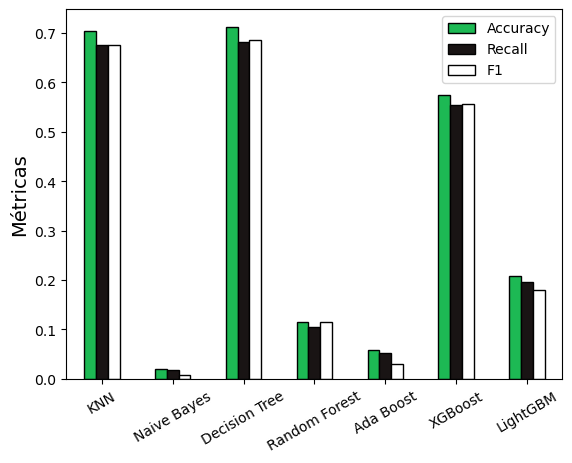

In [63]:
comparacion_modelos.plot(x = 'Modelo', y = ['Accuracy', 'Recall', 'F1'], kind = 'bar', color = ['#1DB954', '#191414', '#ffffff'], edgecolor='black') 

plt.xticks(rotation = 30)
plt.xlabel('')
plt.ylabel('Métricas', fontsize = 14)
plt.legend(loc = 'best')
plt.show()

Se observa un gran variación en las métricas obtenidas en cada modelo. Recordemos que no se hizo ajuste fino de los hiperparámetros en ninguno de ellos, por lo que existe amplio margen de mejora. Sin embargo, seleccionaremos los modelos KNN, Decision Tree y LightGBm para hacer la selección fina de hiperparámetros. El algoritmo XGBoost obtuvo métricas mejores que LightGBM pero sin embargo este requiere de mucho tiempo de cálculo, es por esto que no fue seleccionado.

### 9.4. Búsqueda de hiperparámetros <a class="anchor" id="hiperparametros"></a>

Como dice el título de la sección, se buscarán mejorar los modelos mediante validación cruzada y por medio del ajuste fino de los hiperparámetros mediante el uso de GridSearch. La métrica de evaluación de los algoritmos es accuracy.

#### KNN

In [64]:
params_grid = {
        'n_neighbors': [1, 3, 5, 7, 9, 12],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]}

knn = KNeighborsClassifier(n_jobs = -1)

grid_cv = GridSearchCV(knn, params_grid, scoring = 'accuracy', n_jobs = -1, cv = 3)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 4)}')

Mejores Parametros {'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
Mejor CV score 0.7733711473245101
Accuracy del modelo = 0.8149


#### Decision Tree

In [65]:
params_grid = {
        'max_depth': [5, 10, 15, 20, 25, 30, None],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 5, 10, 15],
        'max_features': ['auto', 'sqrt', 'log2']}

dtc = DecisionTreeClassifier()

grid_cv = GridSearchCV(dtc, params_grid, scoring = 'accuracy', n_jobs = -1, cv = 3)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 4)}')

Mejores Parametros {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor CV score 0.7737462861258666
Accuracy del modelo = 0.8136


#### LightGBM

In [66]:
params_grid = {
        'max_depth': [3, 4, 5],
        'n_estimators': [20, 40, 60],
        'learning_rate': [0.01, 0.1, 1]
        }

lgbm = LGBMClassifier()

grid_cv = GridSearchCV(lgbm, params_grid, scoring = 'accuracy', cv = 2)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 4)}')

Mejores Parametros {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 60}
Mejor CV score 0.20782689595150206
Accuracy del modelo = 0.2159


Se observa que los modelos KNN y Decision Tree obtuvieron las mejores métricas. Sin embargo, Decision Tree es proclive al sobreajuste, por lo que queden compararse las métricas de bondad de ajuste en el conjunto de entrenamiento y de evaluación. En la siguiente sección evaluaremos si los modelos KNN y Decision Tree están sobreajustando o no.

### 9.5. Análisis de sobreajuste <a class="anchor" id="sobreajuste"></a>

#### KNN

In [67]:
knn_acc_train, knn_acc_test = [], []

for i in range(1, 12):

    knn = KNeighborsClassifier(n_neighbors = i, p = 2, weights = 'distance', n_jobs = -1)

    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    knn_acc_train.append(accuracy_score(y_train, y_pred_train))
    knn_acc_test.append(accuracy_score(y_test, y_pred_test))

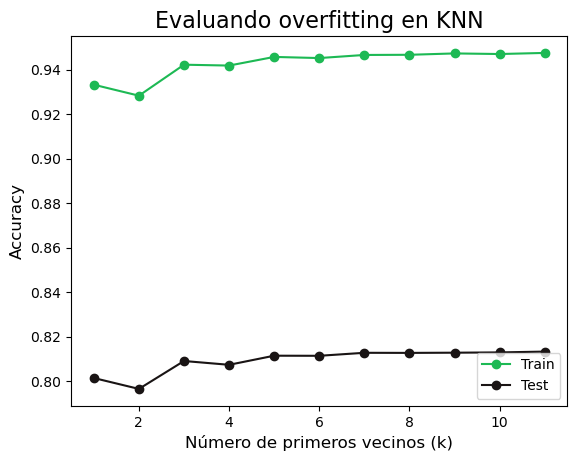

In [68]:
plt.plot(list(range(1,12)), knn_acc_train, '-o', color = '#1DB954', label = 'Train')
plt.plot(list(range(1,12)), knn_acc_test, '-o', color = '#191414', label = 'Test')

plt.xlabel('Número de primeros vecinos (k)', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.title('Evaluando overfitting en KNN', fontsize = 16)
plt.legend(loc = 'best')

plt.show()

Se observa que accuracy en ambos conjuntos aumenta levemente con el número de primeros vecinos. Además, accuracy en el conjunto de evaluación es menor que en el conjunto de entrenamiento, pero no es mucho menor. Esto nos indica que el modelo está generalizando los datos apropiadamente.  

#### Decision Tree

In [69]:
dtc_acc_train, dtc_acc_test = [], []

depth = [5, 10, 15, 20, 25, 30, None]

for i in depth:

    dtc = DecisionTreeClassifier(max_depth = i, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2)

    dtc.fit(X_train, y_train)
    y_pred_train = dtc.predict(X_train)
    y_pred_test = dtc.predict(X_test)

    dtc_acc_train.append(accuracy_score(y_train, y_pred_train))
    dtc_acc_test.append(accuracy_score(y_test, y_pred_test))

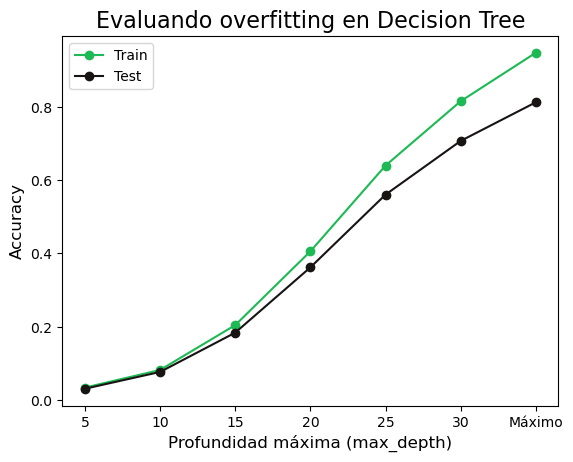

In [70]:
lista = [5, 10, 15, 20, 25, 30, 35]

plt.plot(lista, dtc_acc_train, '-o', color = '#1DB954', label = 'Train')
plt.plot(lista, dtc_acc_test, '-o', color = '#191414', label = 'Test')

ticks = lista
labels = [5, 10, 15, 20, 25, 30, 'Máximo']

plt.xticks(ticks, labels)
plt.xlabel('Profundidad máxima (max_depth)', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.title('Evaluando overfitting en Decision Tree', fontsize = 16)
plt.legend(loc = 'best')

plt.show()

En la figura se graficaron las métricas accuracy evaluadas para el dataset de entrenamiento y el de evaluación en función de max depth. Se observa que a bajos valores ambas curvas son muy similares pero en torno a max depth = 20 estas se empiezan a separar. En este momento es cuando el algoritmo empieza a sobreajustar. Ahora variamos min_samples_split mientras max_depth = 20.

In [71]:
dtc_acc_train, dtc_acc_test = [], []

split = [2, 5, 10, 15, 20]

for i in split:

    dtc = DecisionTreeClassifier(max_depth = 20, max_features = 'auto', min_samples_leaf = 1, min_samples_split = i)

    dtc.fit(X_train, y_train)
    y_pred_train = dtc.predict(X_train)
    y_pred_test = dtc.predict(X_test)

    dtc_acc_train.append(accuracy_score(y_train, y_pred_train))
    dtc_acc_test.append(accuracy_score(y_test, y_pred_test))

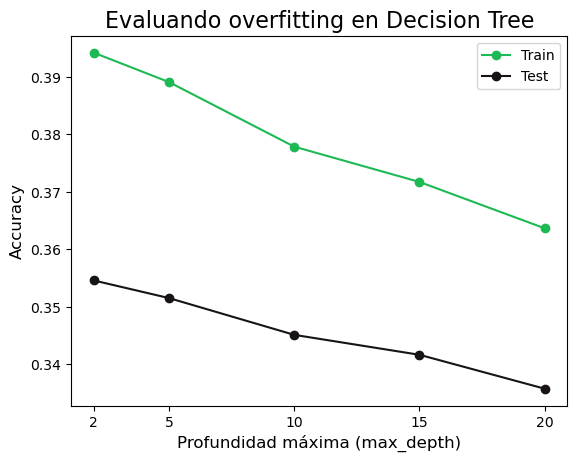

In [72]:
plt.plot(split, dtc_acc_train, '-o', color = '#1DB954', label = 'Train')
plt.plot(split, dtc_acc_test, '-o', color = '#191414', label = 'Test')

plt.xticks(split)
plt.xlabel('Profundidad máxima (max_depth)', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.title('Evaluando overfitting en Decision Tree', fontsize = 16)
plt.legend(loc = 'best')

plt.show()

En este caso obtenemos un máximo de accuracy a min_sample_split = 2, a mayores valores de la variable la métrica disminuye. Por ello selecciomamos min_sample_split = 2. Con estos hiperparámtros accuracy es apenas superior a 0.36, el valor anterior de 0.81 es sin lugar a dudas producto del sobreajuste.

En resumen, el mejor modelo fue el modelo KNN, el cual usando 12 primeros vecinos y usando la distancia como método para calcular los pesos obtuvo un accuracy de 0,81. Es decir, el algormito logró predecir el género de las canciones con un 81 % de exactitud.

## 10. Aprendizaje automático: Agrupación <a class="anchor" id="agrupacion"></a>
---

En esta sección se aplicará el algoritmo de agrupación KMeans, con el objetivo de agrupar las canciones presentes en el dataset en función de sus similitudes y diferencias.

In [73]:
df_cluster = df_proc.copy()

In [74]:
scaler = preprocessing.StandardScaler().fit(df_cluster)
df_cluster = scaler.transform(df_cluster)

In [75]:
wcss, db, slc, cal = [], [], [], []

for k in range(2, 30): 
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(df_cluster)

    wcss.append(kmeans.inertia_) # Inercia
    db.append(davies_bouldin_score(X_scaled, kmeans.labels_)) # Indice de Davies Bouldin

Por medio un for loop analizaremos la métrica inercia y el puntaje de Davies Bouldin. El primero es la medida de las distancias intra-clúster y el segundo se define como la medida de similitud media de cada clúster con su clúster más similar, donde la similitud es la relación entre las distancias dentro de un clúster y las distancias entre clúster.

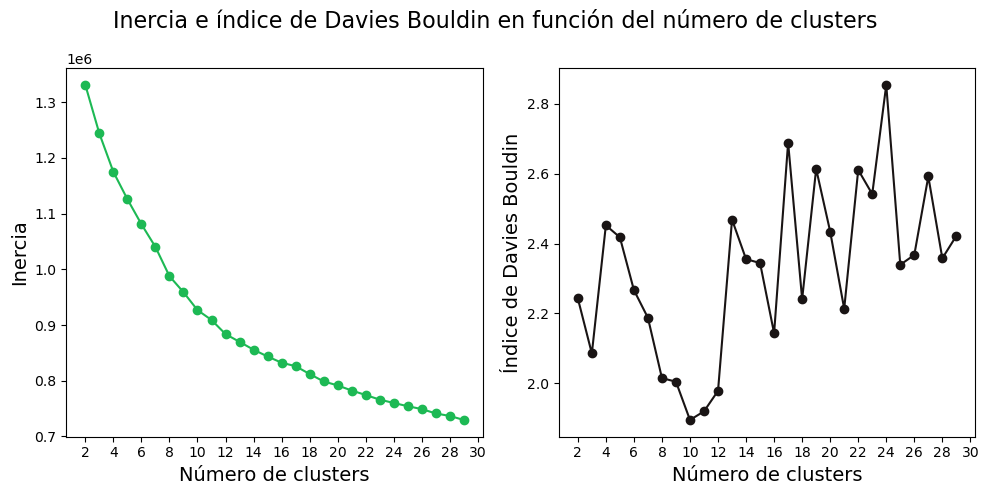

In [76]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))

color = ['#1DB954', '#191414']

for idx, i in enumerate([wcss, db]):
    axes[idx].plot(np.arange(2, 30, 1), i, '-o', color = color[idx])
    axes[idx].set_xlabel('Número de clusters', fontsize = 14)
    axes[idx].set_xticks(np.arange(2,32,2))
        
axes[0].set_ylabel('Inercia', fontsize = 14)
axes[1].set_ylabel('Índice de Davies Bouldin', fontsize = 14)

plt.suptitle('Inercia e índice de Davies Bouldin en función del número de clusters', fontsize = 16)
plt.tight_layout()
plt.show()

El gráfico de la izquierda grafica la inercia en función del número de clusters, este gráfico se lo conoce coloquialmente como el método del clúster. Este busca encontrar un punto de inflexión en el cual incrementos posteriores del número de clusters no provean una disminución significativa de la inercia. En este caso, en torno a k = 10 - 12 se observa una leve reducción en la pendiente. Esto no es concluyente y nos ayudaremos del gráfico de la derecha, que ilustra el índice de Davies Bouldin en función del número de clúster. Este gráfico presenta un mínimo a k = 10, lo que coincide con el análisis realizado por medio de la inercia.

In [77]:
n_clusters = 10

clusterer = KMeans(n_clusters = n_clusters, max_iter = 1000, init = 'k-means++', random_state = 42)
cluster_labels = clusterer.fit_predict(df_cluster)

silhouette_avg = silhouette_score(df_cluster, cluster_labels)
sample_silhouette_values = silhouette_samples(df_cluster, cluster_labels)

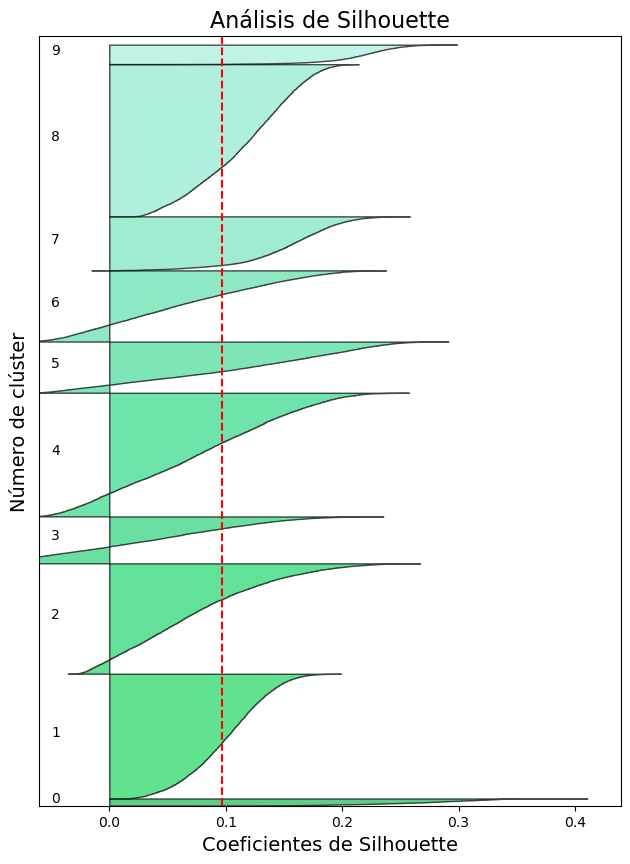

In [78]:
y_lower = 10

verdes =[
    '#1DB954', '#1ED760', '#1FD76C', '#2AD47B', '#30D886', '#47DA98', 
    '#5EDFAA', '#76E5BD', '#8DE9CF', '#A4EEDF', '#BAF3EF', '#D1F7FF']

plt.figure(figsize = (7.5, 10))

for i in range(n_clusters):

    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    
    plt.fill_betweenx(
        np.arange(y_lower, y_upper), 0,
        ith_cluster_silhouette_values,
        facecolor = verdes[i], edgecolor = 'black', linewidth = 1,
        alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.xlim(-0.06, None)
plt.ylim(0, 90000)
plt.yticks([]) 

plt.xlabel("Coeficientes de Silhouette", fontsize = 14)
plt.ylabel("Número de clúster", fontsize = 14)
plt.title("Análisis de Silhouette", fontsize = 16)

plt.axvline(x = silhouette_avg, color = "red", linestyle = "--")
plt.show()

En el gráfico anterior representamos los Coeficientes de Silhouette para para los diez clusters obtenidos. El valor de la puntuación de Silhouette varía de -1 a 1. Si la puntuación es 1, el cluster es denso y está bien separado de otros clústers. Un valor cercano a 0 representa clusters solapados con muestras muy cercanas al límite de decisión de los clusters vecinos. Una puntuación negativa indica que las muestras podrían haber sido asignadas a clusters erróneos. Se observa que varias canciones posiblemente hayan sido mal asignadas, estoy es probable, debido a que existen canciones que guardan pequeñas diferencias entre ellas, lo que hace posible errores en las clasificaciones. 

In [79]:
df['pred'] = cluster_labels
df.groupby(['pred']).mean(numeric_only = True).round(2)

,popularity,explicit,danceability,energy,key,mode,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,loudness_db
pred,,,,,,,,,,,,,,
0,28.07,0.09,0.42,0.46,4.95,0.67,0.60,0.32,0.26,0.32,108.28,0.99,3.24,13.12
1,36.94,0.00,0.65,0.73,6.14,0.00,0.20,0.04,0.18,0.59,120.38,3.98,3.67,6.44
2,34.29,0.00,0.43,0.81,5.11,0.79,0.08,0.07,0.20,0.34,144.20,3.93,4.01,5.41
3,33.90,0.08,0.51,0.74,5.25,0.70,0.38,0.07,0.78,0.49,119.22,3.93,3.90,7.83
4,31.79,0.00,0.51,0.35,4.94,0.78,0.73,0.05,0.16,0.38,113.36,3.83,3.50,11.10
5,29.00,0.00,0.36,0.18,4.83,0.65,0.87,0.81,0.15,0.19,105.61,3.80,3.37,21.17
6,25.83,0.00,0.60,0.74,5.62,0.50,0.09,0.78,0.17,0.33,127.21,3.96,5.13,8.60
7,38.06,1.00,0.63,0.73,5.35,0.58,0.18,0.06,0.20,0.47,123.15,3.99,3.34,6.28
8,33.96,0.00,0.67,0.72,4.94,1.00,0.24,0.03,0.17,0.70,119.45,3.98,3.43,6.61


Esta tabla muestra los valores promedio de cada variable en cada clúster. Se utilizarán estos clusters para desarrollar un sencillo sistema de recomendación de canciones.

## 11. Sistema de recomendación <a class="anchor" id="recomendacion"></a>
---

In [80]:
df_semi_proc['pred'] = cluster_labels
df_semi_proc.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,danceable,pred
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,...,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.84,No bailable,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,...,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.49,No bailable,4
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,...,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.51,No bailable,4
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,...,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.37,No bailable,4
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,...,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.31,No bailable,4


In [81]:
def recomendacion(cancion):
    
    criterio1 = df_semi_proc['artists'] == cancion['artists']
    criterio2 = df_semi_proc['track_name'] == cancion['track_name']
    
    try:
        filtro = df_semi_proc.loc[criterio1 & criterio2]
        grupo = filtro['pred'].iloc[0]
        
        filtro_grupos = df_semi_proc[df_semi_proc['pred'] == grupo]
        recomendacion = filtro_grupos.sample(10)
        
        print(recomendacion[['artists', 'track_name']].to_string(index=False))
        
    except:
        print('La canción insertada no se encuentra en la base de datos')

El sistema de recomendación de canciones realizado requiere de que le demos una canción (que exista en el dataset), y otorga diez canciones aleatorias pero que pertenezcan al mismo cluster que la canción insertada.

In [82]:
cancion = {'artists': 'Ingrid Michaelson', 'track_name': 'To Begin Again'}

recomendacion(cancion)

            artists                                                                                         track_name
               Lauv                                                                                    Who (feat. BTS)
        John Denver                                                                                       Annie's Song
   Keto Dzhaparidze                        Ya Pomnyu Valsa Zvuk Pryelyestniy (I Remember the Wonderful Sound of Waltz)
    Alberto Podestá                                                                                                Uno
         William So                                                                                             愛一個人好難
        Lara Fabian                                                                                  Je Suis Mon Coeur
       George Jones                                                                    Tell Me My Lying Eyes Are Wrong
Los Pasteles Verdes                             

## 12. Conclusiones y cierre <a class="anchor" id="conclusiones"></a>
---

En este proyecto estudiamos datasets de canciones alojadas en el servicio Spotify. El objetivo es poder predecir el género a la que pertenecen cada canción en función de diversas variables, para luego aplicar un algoritmo de agrupamiento con el cual crear un sistema de recomendación de canciones.  

Se realizó el procedimiento usual de análisis exploratorio, de limpieza y curación de datos. Se evaluaron varios métodos de selección y reducción de la dimensionalidad, siendo seleccionado el método secuencial de selección. A continuación, se evaluaron varios modelos de aprendizaje automático de clasificación, se preseleccionaron tres de ellos: KNN, Decision Tree y LightGBM. Luego se hizo un ajuste de hiperparámetros por medio del método GridSearch y por último se verificó si incurrían en sobreajuste o no. El mejor ajuste se obtuvo por medio de modelo KNN Classifier, el cual logró predecir el género de las canciones con una exactitud del 81%.

Por último, se utilizó el modelo KMeans para agrupar las canciones en grupos basándonos en sus similitudes y diferencias. Por medio de la inercia y del índice de Davies Bouldin se determinó que el mejor número de clusters es 10. Luego, con estos clusteres se armó un sistema de recomendación que solicita una canción y a partir de la cual entrega diez canciones al azar que pertenecen al mismo clúster.